# Techno Industries Inc.

Techno Industries Inc. a leader of manufacturing different equipment components, has observed that market demand
has been strong over the past few years with growth averaging 6.9% Year-on-Year.
As a Fortune 500 corporation, this good growth has led the company to expand their operation and distribution centers across 48 states in the US. With very good growth rates and lower barriers to entry due to government regulation, this has attracted a lot of new companies that increase competition drastically. New businesses are offering better and optimized delivery for components, and some companies have started using machine learning and artificial intelligence to create better technology and lower the production costs for existing components.
After Techno Industries Inc. lost several top long-term customers that brought 11% of the company's revenue, management decided to ceate short-term plan.
If this problem continues, the Techno Industries Inc. market share and potential customer-base will be at risk, also it will indicate a potential risk in the company’s ability to make dividend payments to shareholders if losses are too big.
Techno Industries Inc. currently includes 6 primary industries and 11 different types of components.
Management needs an immediate short-term action plan to address the loss of customers and protect the existing market share.

**The main goal of this project is to determine in which type of components Techno Industries Inc. should invest**

What number of customers in each segment purchase this specific component?     
What is the revenue breakdown per industry?    
Is there any seasonality in industry sales?     
What is the geographic distribution of each segment?     
Which segment yields the highest average profit margin?    
How do segments compare with the number of customers?    
Which products are driving the highest profit?      
Which product has the lowest profit?   
Which product has the highest growth potential?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Loading data and exploring dataset.

In [2]:
df = pd.read_excel(r'C:\Users\vikag\Desktop\Data-Science-Projects\Techno Industries Inc\Techno Industries Inc. Data.xlsx')

In [3]:
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,"LCD, LED, OLED displays",Actuators,Fuse,Resistors,Light Emitting Diode (LED)
State,Massachusetts,New Hampshire,Maine,Maine,New Jersey
Zip Code,2109,3084,4250,4544,7023
Business Type,Industrial,Industrial,Aerospace,Agriculture,Aerospace
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33.0,22.0,11.0,479.0,510.0
Revenue (total),270.6,101.64,26.4,2294.41,943.5


In [4]:
df.describe()

,Customer ID,Zip Code,Cost (per unit),Price (per unit),Quantity,Revenue (total),Cost (total)
count,45516.000000,45516.000000,45516.000000,45516.000000,45516.000000,45516.000000,45516.000000
mean,10159.596164,52364.166447,2.632562,7.455079,212.357523,918.014754,375.560081
std,132.730140,31658.902561,3.654429,10.237572,1874.468932,4325.882521,2226.750648
min,10001.000000,1001.000000,0.550000,0.020000,0.000000,0.000000,0.000000
25%,10042.000000,19969.500000,1.060000,3.300000,10.000000,54.000000,17.250000
50%,10128.000000,53012.500000,1.725000,4.500000,36.000000,187.200000,60.980000
75%,10250.000000,83531.250000,2.215000,6.700000,115.000000,584.800000,227.065625
max,10544.000000,99403.000000,19.100000,100.810000,222317.000000,397947.430000,235656.020000


In [5]:
df.dtypes

Date                datetime64[ns]
Customer ID                  int64
Product                     object
State                       object
Zip Code                     int64
Business Type               object
Cost (per unit)            float64
Price (per unit)           float64
Quantity                   float64
Revenue (total)            float64
Cost (total)               float64
dtype: object

# Data Wrangling

In [6]:
df.isna().sum()

Date                0
Customer ID         0
Product             0
State               7
Zip Code            0
Business Type       0
Cost (per unit)     0
Price (per unit)    0
Quantity            0
Revenue (total)     0
Cost (total)        0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Date,Customer ID,Product,State,Zip Code,Business Type,Cost (per unit),Price (per unit),Quantity,Revenue (total),Cost (total)
111,2015-01-01,10044,Circuit breakers,NaN,88013,Transportation,2.490,4.50,2.0,9.00,4.980
7596,2015-03-03,10468,Circuit breakers,NaN,88013,Industrial,2.490,4.95,17.0,84.15,42.330
15534,2015-05-05,10044,"LCD, LED, OLED displays",NaN,88013,Transportation,2.060,7.20,107.0,770.40,220.420
18221,2015-05-26,10468,"LCD, LED, OLED displays",NaN,88013,Industrial,2.060,4.95,6.0,29.70,12.360
29380,2015-08-24,10468,Thermostat,NaN,88013,Industrial,15.245,61.74,5.0,308.70,76.225
34797,2015-10-06,10044,Thermostat,NaN,88013,Transportation,15.245,46.20,16.0,739.20,243.920
36326,2015-10-18,10044,Resistors,NaN,88013,Transportation,1.575,4.50,2.0,9.00,3.150


Zip Code 88013 is belongs to Las Cruces, New Mexico.    
I will fill missing states with New Mexico.

In [8]:
df.fillna('New Mexico', inplace=True)

In [9]:
df.isna().sum()

Date                0
Customer ID         0
Product             0
State               0
Zip Code            0
Business Type       0
Cost (per unit)     0
Price (per unit)    0
Quantity            0
Revenue (total)     0
Cost (total)        0
dtype: int64

Changing datatype of column QUANTITY from float to int.

In [10]:
df['Quantity'] = df['Quantity'].astype(int)

In [11]:
df.dtypes

Date                datetime64[ns]
Customer ID                  int64
Product                     object
State                       object
Zip Code                     int64
Business Type               object
Cost (per unit)            float64
Price (per unit)           float64
Quantity                     int32
Revenue (total)            float64
Cost (total)               float64
dtype: object

In [12]:
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,"LCD, LED, OLED displays",Actuators,Fuse,Resistors,Light Emitting Diode (LED)
State,Massachusetts,New Hampshire,Maine,Maine,New Jersey
Zip Code,2109,3084,4250,4544,7023
Business Type,Industrial,Industrial,Aerospace,Agriculture,Aerospace
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33,22,11,479,510
Revenue (total),270.6,101.64,26.4,2294.41,943.5


# Exploratory Data Analysis

### Distribution Of Industries

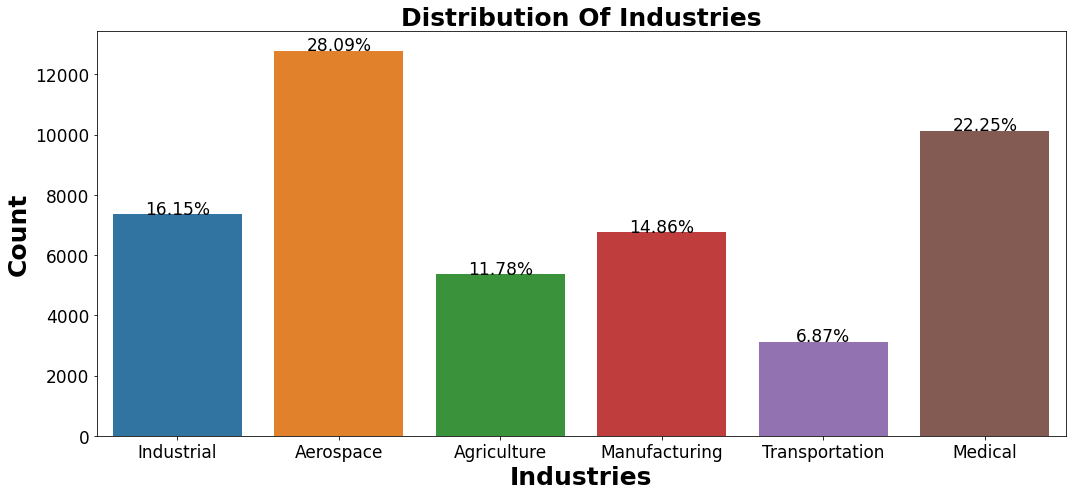

In [13]:
plt.figure(figsize=(15,7))
total = len(df['Business Type'])
ax = sns.countplot(x='Business Type', data=df)
for h in ax.patches:
    height = h.get_height()
    ax.text(h.get_x() + h.get_width() / 2., height + 3,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)
plt.yticks(size = 17)
plt.xticks(size = 17)
plt.xlabel('Industries', size = 25,weight = 'bold')
plt.ylabel('Count', size = 25,weight = 'bold')
plt.title('Distribution Of Industries', size = 25,weight = 'bold')
plt.tight_layout()

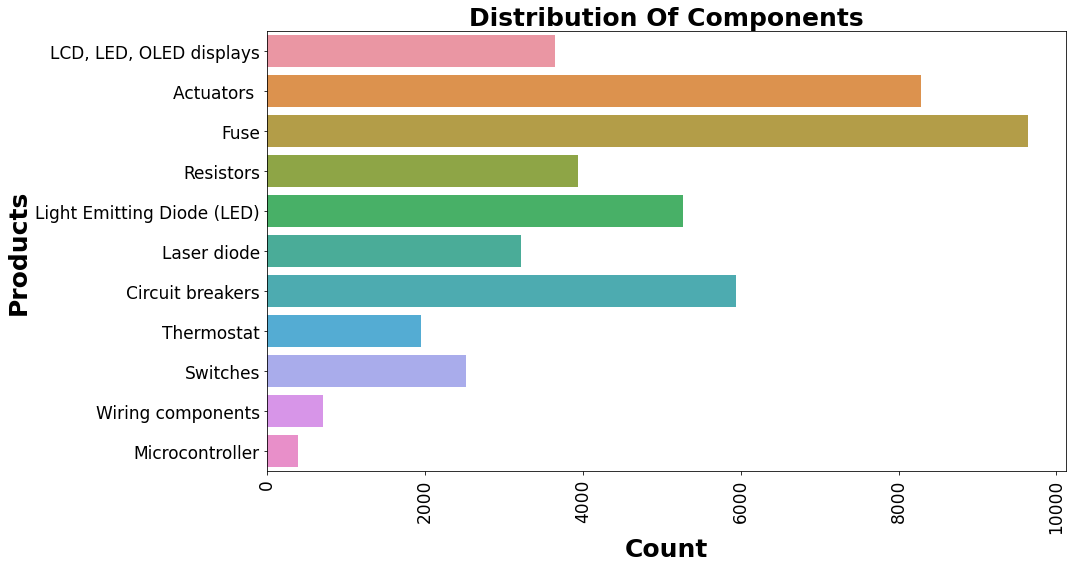

In [14]:
plt.figure(figsize=(15,8))

ax = sns.countplot(y ='Product', data=df)

plt.yticks(size = 17)
plt.xticks(size = 17)
plt.xlabel('Count', size = 25, weight = 'bold')
plt.xticks(rotation=90)
plt.ylabel('Products', size = 25, weight = 'bold')
plt.title('Distribution Of Components', size = 25, weight = 'bold')
plt.tight_layout()

## What number of customers in each segment that purchased this specific component?

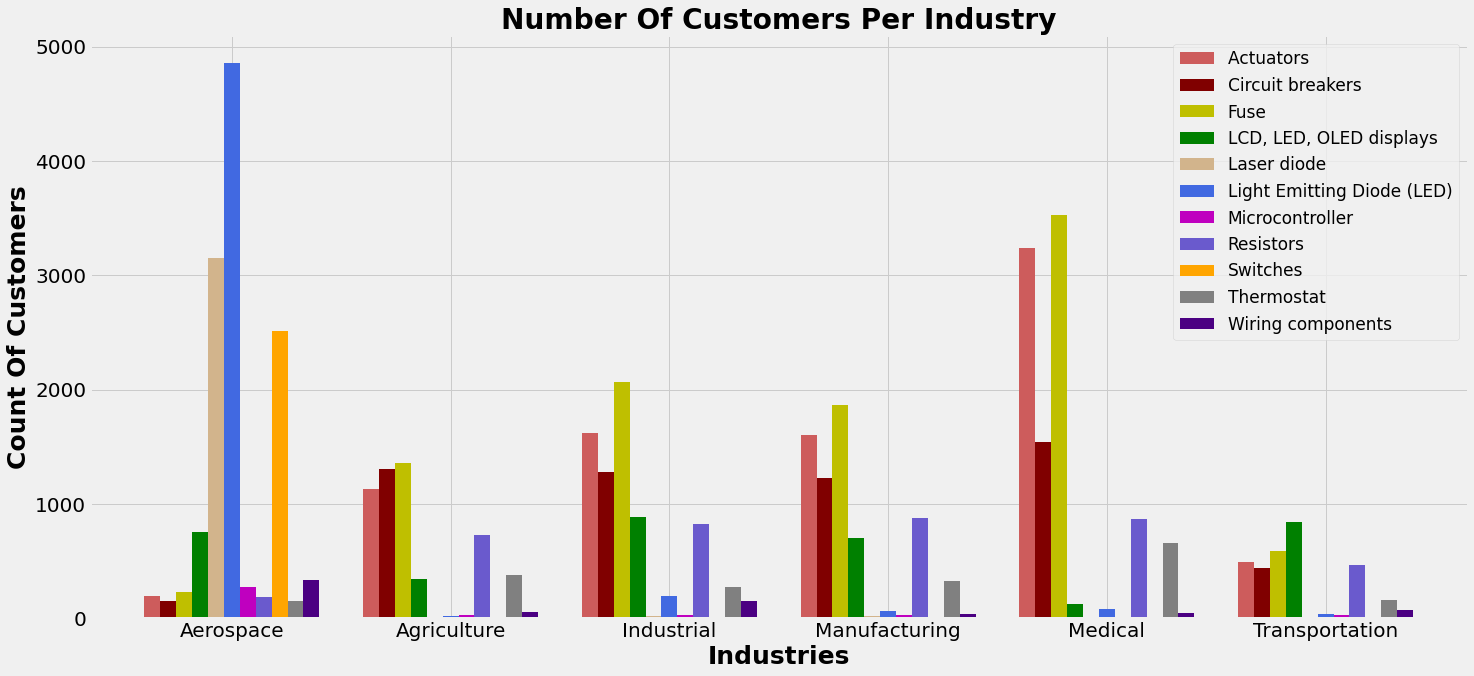

In [15]:
plt.style.use('fivethirtyeight')

color = ['indianred','maroon','y','g','tan','royalblue', 'm', 'slateblue','orange', 'gray', 'indigo']
df.groupby(['Business Type', 'Product'])['Customer ID'].count().unstack().plot.bar(legend=True,color = color,
                                                                                     figsize=(22,10), width=0.8)

plt.yticks(size = 20)
plt.xticks(size = 20)
plt.xticks(rotation = 0) 

plt.legend(fontsize=17)

plt.xlabel('Industries', size = 25, weight='bold')
plt.ylabel('Count Of Customers', size = 25, weight='bold')
plt.title('Number Of Customers Per Industry', size = 28, weight='bold');
plt.show()

## What is the revenue breakdown per industry?

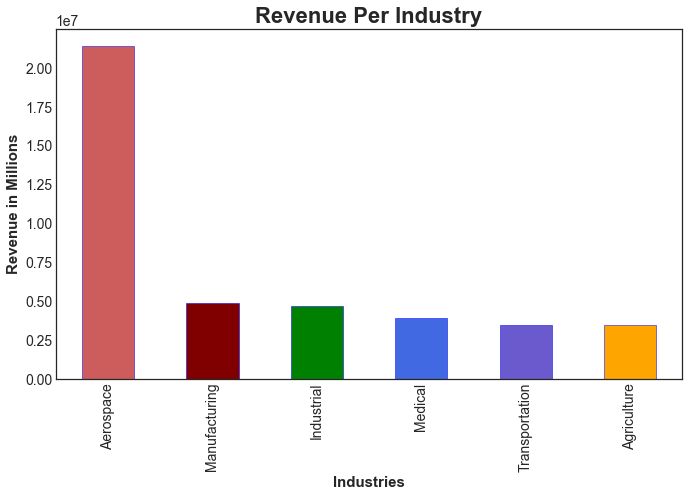

In [16]:
plt.style.use('seaborn-white')

plt.figure(figsize=(10,6))

color = ['indianred','maroon','g','royalblue', 'slateblue','orange']
df.groupby('Business Type')['Revenue (total)'].sum().sort_values(ascending=False).plot(kind = 'bar',
                                                                                       color = color ,edgecolor='blue')

plt.xlabel('Industries', size = 15, weight='bold')
plt.ylabel('Revenue in Millions', size = 15, weight='bold')
plt.title('Revenue Per Industry', size = 22, weight='bold');

## Is there any seasonality in industry sales?

Creating column 'Month' to get only month names, for seasonality plot.

In [17]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

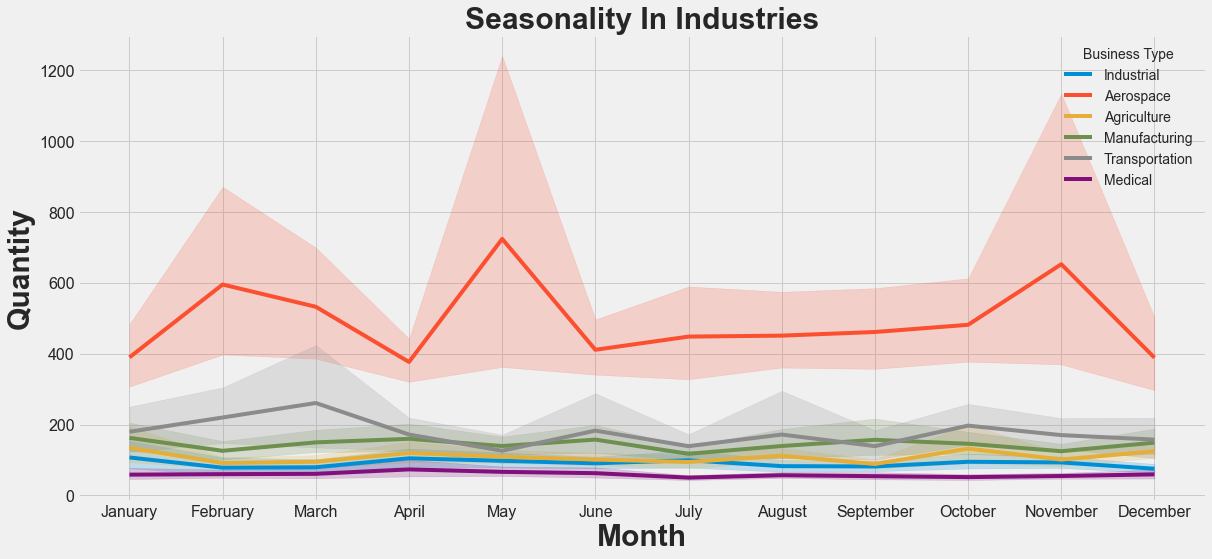

In [18]:
plt.style.use('fivethirtyeight')


y = df['Quantity']
x = df['Month']
hue = df['Business Type']

plt.figure(figsize=(18,8))
ax = sns.lineplot(x = x, y = y, data = df, hue = hue)

plt.yticks(size = 16)
plt.xticks(size = 16)
plt.xlabel('Month', size = 30, weight = 'bold')
plt.ylabel('Quantity', size = 30, weight = 'bold')
plt.title('Seasonality In Industries', size = 30, weight='bold');

## How do segments compare with the number of customers?

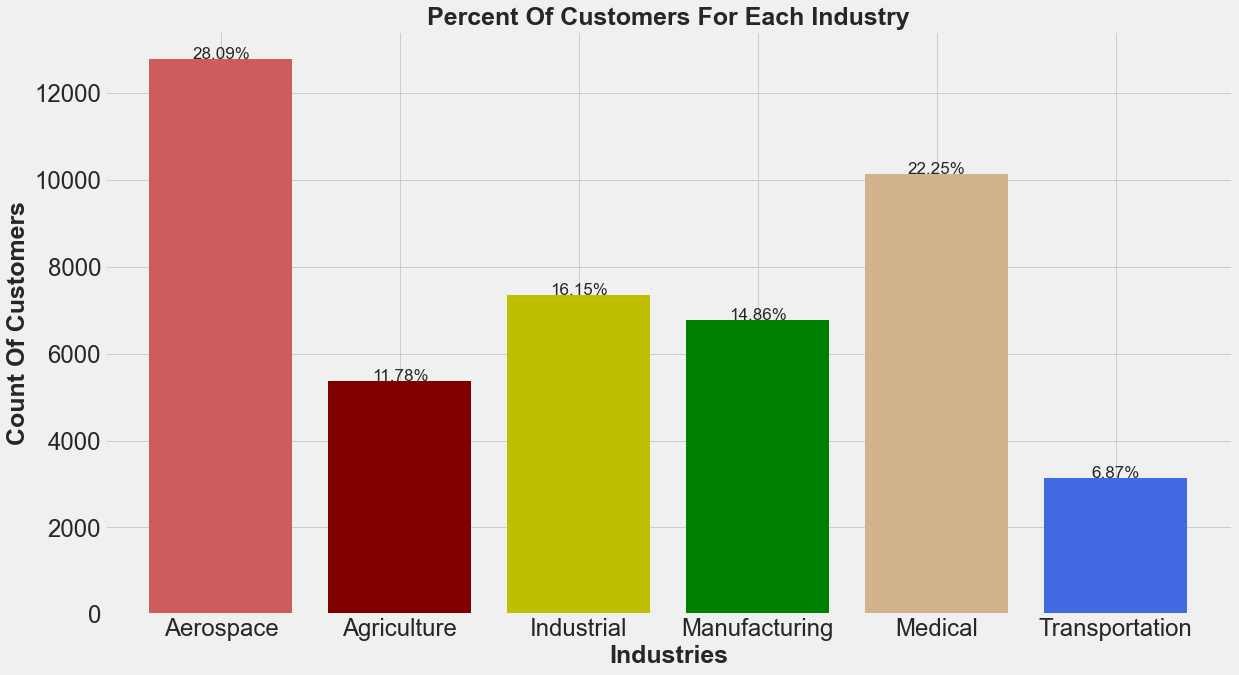

In [19]:
plt.style.use('fivethirtyeight')

color = ['indianred','maroon','y','g','tan','royalblue', 'm', 'slateblue','orange', 'gray', 'indigo']
ax =  df.groupby(['Business Type',])['Customer ID'].count().plot.bar(color = color,figsize = (18,10), width = 0.8)


for h in ax.patches:
    height = h.get_height()
    ax.text(h.get_x() + h.get_width() / 2., height + 3,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)


plt.yticks(size = 24)
plt.xticks(size = 24)
plt.xticks(rotation = 0) 

plt.xlabel('Industries', size = 25, weight='bold')
plt.ylabel('Count Of Customers', size = 25, weight='bold')
plt.title('Percent Of Customers For Each Industry', size = 25,weight = 'bold');

## Which segment yields the highest average profit margin?

I am going to add calculated field 'Net Profit Margin' so I can plot average profit margin per segment.

In [20]:
df['Net Profit Margin'] = df['Revenue (total)'] - df['Cost (total)'] / df['Revenue (total)']
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,"LCD, LED, OLED displays",Actuators,Fuse,Resistors,Light Emitting Diode (LED)
State,Massachusetts,New Hampshire,Maine,Maine,New Jersey
Zip Code,2109,3084,4250,4544,7023
Business Type,Industrial,Industrial,Aerospace,Agriculture,Aerospace
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33,22,11,479,510
Revenue (total),270.6,101.64,26.4,2294.41,943.5
